In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/Srinivas/Desktop/srinivas/SLC/SMSSpamCollection.csv")

In [7]:
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df["Class"] = df["Class"].map({"ham":0,"spam":1})

In [9]:
df.head()

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
y = df["Class"]
X = df.sms

In [11]:
type(X)

pandas.core.series.Series

In [12]:
X.shape

(5572,)

In [13]:
df["Class"].value_counts(normalize=True)

0    0.865937
1    0.134063
Name: Class, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vect = CountVectorizer(stop_words="english")

In [18]:
X_traint = vect.fit_transform(X_train)
X_testt = vect.transform(X_test)

In [19]:
X_traint.shape

(3900, 6904)

In [20]:
pd.DataFrame(X_traint).head()

,0
0,"(0, 4272)\t1\n (0, 6855)\t1\n (0, 4682)\t1"
1,"(0, 2550)\t1\n (0, 3930)\t1\n (0, 3018)\t1..."
2,"(0, 3650)\t1\n (0, 3548)\t1\n (0, 5957)\t1..."
3,"(0, 4406)\t1\n (0, 1485)\t1\n (0, 6353)\t1"
4,"(0, 3685)\t1\n (0, 6043)\t1\n (0, 2000)\t1..."


In [21]:
vect.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0789xxxxxxx',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 '08701417012',
 '08701417012150p',


In [22]:
vect.stop_words

'english'

In [23]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
bnb = BernoulliNB()


bnb.fit(X_traint,y_train)

y_prob_train = bnb.predict_proba(X_traint)[:,1]
y_pred_train = bnb.predict(X_traint)

y_prob_test = bnb.predict_proba(X_testt)[:,1]
y_pred_test = bnb.predict(X_testt)


print("Accuracy BNB Train:",accuracy_score(y_train,y_pred_train,))
print("Accuracy BNB Test:")
print(accuracy_score(y_test,y_pred_test))

print("AUC BNB Train:",roc_auc_score(y_train,y_prob_train,))
print("AUC BNB Test:")
print(roc_auc_score(y_test,y_prob_test,))


Accuracy BNB Train: 0.9869230769230769
Accuracy BNB Test:
0.9730861244019139
AUC BNB Train: 0.9979056735492229
AUC BNB Test:
0.9963155038292226


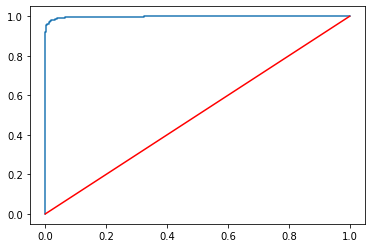

In [24]:
fpr,tpr,thresholds = roc_curve(y_train,y_prob_train)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.show()